In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
iris_df = pd.read_csv(r'C:\Users\Administrator\Downloads\Iris.csv')
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape #size of the object

(150, 6)

In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# DATA VISUALISATION OF THE DATASET

Text(0.5, 0, 'Petal Length (cm)')

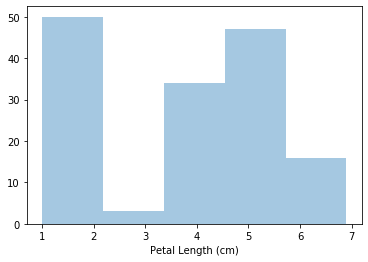

In [22]:
sns.distplot(a = iris_df['PetalLengthCm'], kde = False)
plt.xlabel('Petal Length (cm)')

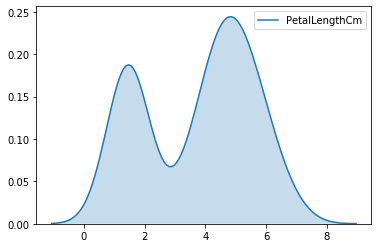

In [21]:
sns.kdeplot(data = iris_df['PetalLengthCm'],shade = True)

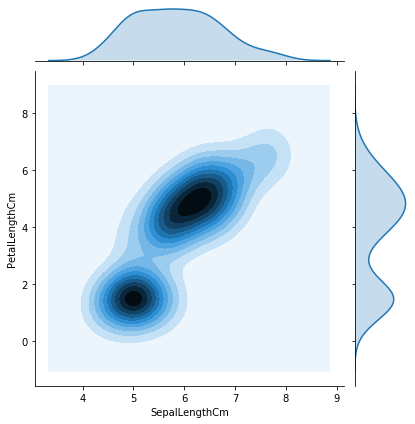

In [25]:
sns.jointplot(x=iris_df['SepalLengthCm'], y = iris_df['PetalLengthCm'], kind = 'kde')



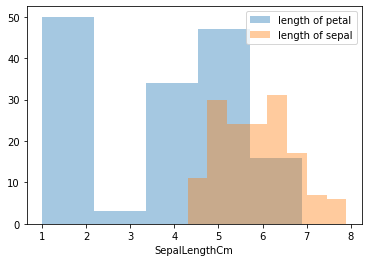

In [27]:
sns.distplot(a = iris_df['PetalLengthCm'], label = 'length of petal', kde = False)
sns.distplot(a = iris_df['SepalLengthCm'], label = 'length of sepal', kde = False)
plt.legend()

In [31]:
iris_set = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-setosa.csv', index_col = 'Id')
iris_ver = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-2.csv', index_col = 'Id')
iris_vir = pd.read_csv(r'C:\Users\Administrator\Desktop\iris-3.csv', index_col = 'Id')

Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

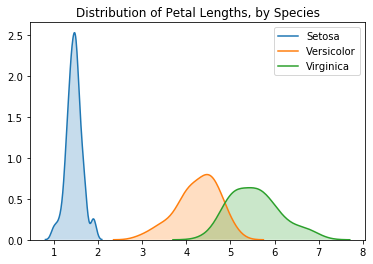

In [32]:
sns.kdeplot(data=iris_set['PetalLengthCm'], label="Setosa", shade=True)
sns.kdeplot(data=iris_ver['PetalLengthCm'], label="Versicolor", shade=True)
sns.kdeplot(data=iris_vir['PetalLengthCm'], label="Virginica", shade=True)
plt.legend()
plt.title("Distribution of Petal Lengths, by Species")

# Decision Tree algorithm

In [36]:
X = iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [37]:
y = iris_df['Species']
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 3)

In [42]:
X_train.shape


(105, 4)

In [41]:
y_train.shape

(105,)

In [43]:
X_test.shape

(45, 4)

In [44]:
y_test.shape

(45,)

The shapes of the trained data and tested data of X and Y are matching.


In [73]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
tree #shows default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
clf = tree.fit(X_train, y_train)

In [52]:
pred_tree = tree.predict(X_test)
print(pred_tree[0:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [53]:
print(y_test[0:10])

47         Iris-setosa
3          Iris-setosa
31         Iris-setosa
25         Iris-setosa
15         Iris-setosa
118     Iris-virginica
89     Iris-versicolor
6          Iris-setosa
103     Iris-virginica
65     Iris-versicolor
Name: Species, dtype: object


In [55]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

DecisionTrees's Accuracy:  0.8888888888888888


[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\nentropy = 1.584\nsamples = 105\nvalue = [33, 36, 36]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[3] <= 1.65\nentropy = 1.0\nsamples = 72\nvalue = [0, 36, 36]'),
 Text(66.96000000000001, 108.72, 'X[2] <= 4.95\nentropy = 0.398\nsamples = 38\nvalue = [0, 35, 3]'),
 Text(33.480000000000004, 65.232, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 2.75\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'entropy = 1.0\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(133.92000000000002, 21.744, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 4.85\nentropy = 0.191\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(234.36, 65.232, 'X[1] <= 3.1\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(200.88000000000002, 21.744, 'entropy = 0.0\nsamples = 2\n

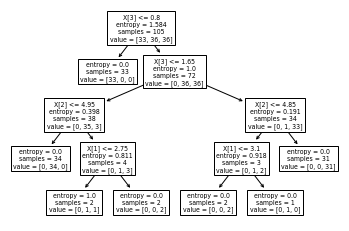

In [76]:
from sklearn import tree
tree.plot_tree(clf)

In [77]:
conda install python-graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Administrator\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |           py37_0         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    python-graphviz-0.14       |             py_0          25 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  python-graphviz    pkgs/main/noarch::python-graphviz-0.14-py_0

The following packages will be UPDATED:

  conda                                        4.8.2-py37_0 --> 4.8.3-py37_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-

In [78]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

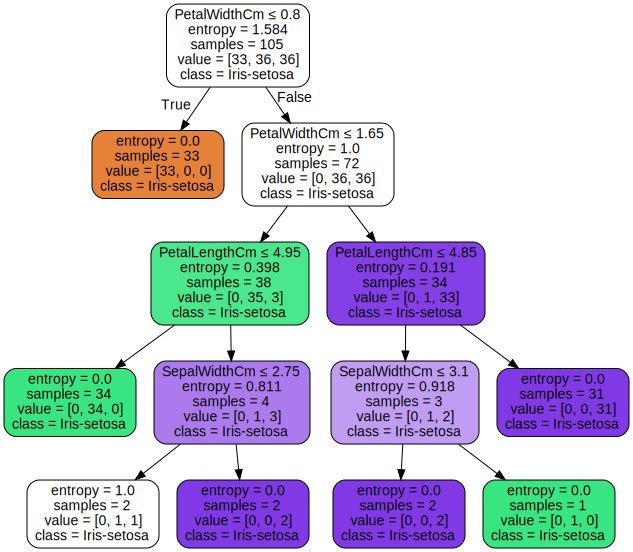

In [81]:
feature_names = iris_df.columns[1:5]
target_names = iris_df['Species']
dot_data = tree.export_graphviz(clf, out_file=None, 
                    feature_names= feature_names,  
                    class_names= target_names,  
                    filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 